#                                              Brexit Tweets

Assessment project for CASA0006 course, Data Science for Spatial Systems

Submitted by Jay Wilson, student ID ucfnjwi
April 2019

What insights does Brexit reveal about Twitter data?  The question is not the wrong way round, although certainly the first intention was to use Twitter to gain insight into how Brexit unfolded in the weeks leading up to the initial deadline of Friday 29 March 2019 even as that deadline was extended (Vey, Lough and Baczynska, 2019).  But analysing the complexities of Brexit via Twitter would fail for two reasons.

The first is that attitudes towards Brexit are too complex for tweets.  Enough time has passed since a successful example of the reverse process to Brexit, the Belfast/ Good Friday Agreement in 1998 between the Republic of Ireland, Northern Ireland and the United Kingdom, for studies to show the overlapping subtleties in personal attitudes and identities in adolescents' essays nearly a decade later (Muldoon et al., 2007).  The internal dischord revealed in these studies was echoed in a conversation in Fitzrovia, London when comparing personal attitudes about 2009's near-Grexit to 2019's ongoing Brexit, "My heart said yes - but my head said no," (J. Wilson, personal communication, 20 March 2019).  Twitter usage is a "complex picture that should lead us to be wary" (Loader and Mercea, 2011) and so the aim of this assignment switched to learning about Twitter from tweets relating to Brexit.  Other political events researched to compare with Brexit were the 2009 European Parliament elections, the 2014 Scottish Referendum and the 2016 UK Referendum.  One exception was made to analyze the reaction on Twitter to the assassination of Labour MP Jo Cox a week before the UK Referendum.

The second is that accessing large volumes of Twitter data is expensive.  The free access of earlier years is now very restricted and the "sandbox" account for premium Twitter access did not work in trials.  Paying for premium access permits up to one hundred downloads within a month's timespan and each download is limited to five hundred tweets.  At peak participation rates, when Twitter users followed a nationally televised election debate (BBC's Question Time in 2009) five hundred tweets used to "express a range of overlapping identities" would be used up in less than two minutes  (Anstead and O’Loughlin, 2011).  The other issue is that because free historic exploration of tweets is impossible a dozen searches were wasted on the 2008-9 Icelandic banking crisis with no relevant results and another six searches were wasted when the wrong month was used for the 2009 European Parliament elections.

### Accessing Twitter with twurl

Twitter enables access with 'twurl', a modified cURL using OAuth to access the Twitter API and authorise all requests.  On Linux twurl runs in a command-line terminal such as Bash, not Python.  Access is granted using this command

twurl authorize -u NarratorJay --consumer-key oot(shortened sequence)u7R --consumer-secret SXv(shortened sequence)lu5

and then queries can be run.  Below is a sample query (from the file bashScottishReferendum.sh in the folder 'TwitterTwurlRequestScripts' in this submission) containing the search query subject, the search parameters and the export command sending the file contents of remote JSON results in the Twitter developer area to a local file.

twurl -t -A "Content-Type: application/json" -d '{"query":"#Salmond","maxResults":"500","fromDate":"201409170500","toDate":"201409172300" }' "/1.1/tweets/search/fullarchive/BrexitMoon.json" > ~/Downloads/sdsv/CASA0006dsss/BrexitMoon/tw/20140917Salmond.json

The date and time in a twurl API call are in ISO8601 format, YYYY-MM-DD, but the Twitter API returns do not use it for dates.  The returned date format was corrected later in a spreadsheet package.  Later on, analysis showed this investigation would hit the same rate of tweets as Anstead and O'Loughlin for some search terms, adding an extra factor of time to account for when comparing the nuance of tweet sentiments for different subjects.  For instance, because Twurl requests are filled in reverse time order with the most recent tweet first, search term #Tusk (for Donald Tusk, President of the European Council) would return results spread over a much longer time period and much earlier in the day than results for #Theresa (for Theresa May, UK Prime Minister).

Almost ninety successful twurl queries provided JSON files to import into Twitter.  The following code imports data from ten useful JSON keys into a csv file as the majority of JSON keys returned empty data even with 'Premium' access.  Only six JSON files are provided as the full set would almost break the 170MB assessment limit and the importing process for all the files is identical.

### Run this script to import sample Twitter JSON results to a csv file.

In [1]:
import json
import csv
import os

## SAMPLE IMPORT of six JSON files ##

# set up empty csv file with column headers for each tweet's imported field,
# specify csv columns matching desired JSON dictionary keys and path to JSON files
csvOut = open('tweetImport-assessor.csv', mode='w')
write2csv = csv.writer(csvOut)
jsonFields = ['TweetTime', 'Tweet', 'Location', 'FollowersCount', 'FriendsCount', 'ListedCount', 'FavouritesCount', 'StatusesCount', 'UserCreatedAt', 'Lang']
write2csv.writerow(jsonFields)
tweetPath = './sampleTwitterJSON/'

# open each JSON file in the tweet download directory
for eachFile in os.listdir(tweetPath):
    fullPath = tweetPath + eachFile
    dataJson = open(fullPath, mode='r').read()
    dataPython = json.loads(dataJson)

    # writes a row to csv from fields in json object, most fields are in the 'user' sub-dictionary so .get twice
    # failed to get co-ordinates, possibly due to nested .get limit, ignored as most tweets did not have co-ords
    for eachLine in dataPython.get('results'):
        write2csv.writerow([eachLine.get('created_at'),
        eachLine.get('text').encode('unicode_escape'),      # unicode_escape to fix emoji issue
                     eachLine.get('user').get('location'),
                     eachLine.get('user').get('followers_count'),
                     eachLine.get('user').get('friends_count'),
                     eachLine.get('user').get('listed_count'),
                     eachLine.get('user').get('favourites_count'),
                     eachLine.get('user').get('statuses_count'),
                     eachLine.get('user').get('created_at'),
                     eachLine.get('user').get('lang')])

csvOut.close()

print ('Import to csv has finished.')

Import to csv has finished.


Any errors wasted valuable twurl requests.  Getting the date of the wrong for the 2009 European Parliament elections meant that there were only enough requests left for the days either side of the election.  Searching for #EU and #UKIP was successful but #Farage returned no tweets.  Other tweets showed that @Nigel_Farage would have been a better search term, hinting that Twitter usage of #Name in discussion instead of the @Username handle happened later.  The unexpected appearance of #UK pornographic links while investigating the Scottish referendum meant that dozens of tweets were deleted from the csv.

But more twurl requests were wasted through not exploring first:  no relevant results at all came back from the earliest searches about the 2008-9 Icelandic banking crisis.  There are only 27,000 tweets to analyse out of a possible 50,000.

Sentiment analysis also turned out to be expensive.  Two providers, Aylien and Azure, were tested with five hundred tweets and their results are recorded in the first five hundred rows of tweets in the attached AssessmentData-0.csv file.  The Azure results contained too many 0.5 answers.  As sentiment analysis typically returns a fifteen-digit float between 0 (negative sentiment) and 1 (positive sentiment) it is likely that Azure uses 0.5 to indicate that it is unsure of what sentiment score to return.  The other issue is that Azure must be informed of what language it is analysing and returns an error if the language field imported from Twitter does not contain a language it recognises it can analyse, such as Catalan 'ca' or Taiwanese Mandarin 'zh-tw'.

As an aside, it is conceivable that using a language from Catalania or Taiwan can be used to show support for Brexit (as both these regions have an uneasy relationship with their neighbouring, more-powerful government) regardless of tweet content, but this goes beyond sentiment analysis.

### Do not run this script that was used to trial and ultimately discount Azure sentiment analysis.

In [ ]:
import time
import pandas as pd
import numpy as np
import requests                 # makes it possible to run API request in Python instead of .sh Bash scripts
from pprint import pprint
from IPython.display import HTML

# the key is issued after signing up and creating an account on Microsoft's Azure platform
azureKey = '58(shortened sequence)ab'
azureEndpoint = 'https://uksouth.api.cognitive.microsoft.com/text/analytics/v2.0/sentiment'

tweetDF0 = pd.read_csv('trialAllRows.csv')

azureList = list(range(0, 27006)) 

for i in azureList:
    tweetID = str(i)                               # turn the counter into a string for Azure
    tweetLang = tweetDF0.iloc[i]['Lang']           # Azure must be informed of the language it is analysing
    tweetText = tweetDF0.iloc[i]['Tweets']         # text of tweet to analyse
    
    azureDoc = {'documents' : [{'id': tweetID, 'language': tweetLang, 'text': tweetText}]}
    
    headers = {"Ocp-Apim-Subscription-Key": azureKey}
    azureResponse = requests.post(azureEndpoint, headers=headers, json=azureDoc)
    azureData = azureResponse.json()
    azureidscore = azureData.get('documents')
    azureSentiment = azureidscore[0].get('score')
    
    # check progress and identifies the line before the line containing the text that caused an error
    print('line', i, 'has returned azureSentiment', azureSentiment)   
    tweetDF0.at[i, 'azureSentiment'] = azureSentiment
    # not sure that this is necessary but this delay tactic was used with the free Aylien sentiment analyser
    time.sleep(0.5)                        
    
    
tweetDF0.to_csv('azure27000rows.csv')

The Aylien API improved on Azure in that it did not return errors due to unrecognised languages nor preturn obvious values to indicate that something different to successful sentiment analysis had occurred.  The free version is limited to 500 queries per day and time pressures meant that the Developer account was necessary to process 27,000 tweets in a single run.

### Do not run this script used to process 27,000 tweets for Aylien sentiment analysis over a fifteen hour period.

In [ ]:
import time
import pandas as pd
import numpy as np
from aylienapiclient import textapi

tweetDF0 = pd.read_csv('proAylien-0.csv')
# earlier tests showed that the developer Aylien account returned identical results to the free Aylien account
aylienList = list(range(120, 27003))

for i in aylienList:
    tweetText = tweetDF0.iloc[i]['Tweets']
    tweetInQuotes = '"%s"' % tweetText            # testing showed that Aylien Text API used double-quotes                     
    
        
    aylienClient = textapi.Client("2e3652f1", "ee8352156ef7eeb796d443ea9b64be1a")
    aylienSentiment = aylienClient.Sentiment({"text": tweetInQuotes})
    
    tweetDF0.at[i, 'proAylienPolarity'] = aylienSentiment['polarity_confidence']
    tweetDF0.at[i, 'proAylienSubjectivity'] = aylienSentiment['subjectivity_confidence']
    
    # developer account allows 120 hits per minute (https://developer.aylien.com/plans) and I am pretty cautious here
    time.sleep(2)
    # tracking progress by printing a line and a result every 90th request which is once every three minutes    
    if i % 90 == 8:                                                                        
        print("Row", i, "returned proAylienPolarity", aylienSentiment['polarity_confidence'])

tweetDF0.iloc[0:] 
# the csv file below had the dates tidied and became AssessmentData-0.csv in this zipped submission
tweetDF0.to_csv('proAylien-1.csv')

All the data is now ready for analysis.  It was at this point that the shortcomings of this study of Brexit on Twitter became apparent.  The CASA module title ends with the words '... Spatial Studies', implying at least two dimensions, and the dataframe from the csv file has only one (temporal) dimension, requiring extra work to provide decent insight.

The Twitter activity immediately before and after the 2009 European Parliament elections on Thursday 4th June (in the UK, EU member states held elections between 3rd - 5th June) is the first chosen for sentiment analysis.  Barcharts are chosen to make it visually easy to work out relationships, later examples will be more subtle and require machine analysis.

### Run this script to display the first barchart analysis

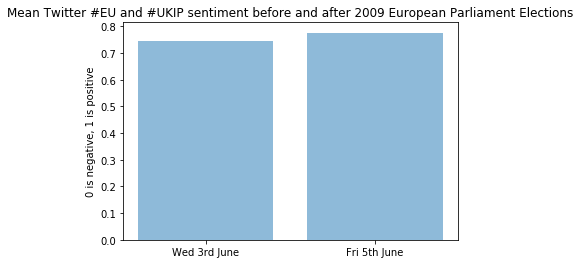

In [5]:
###### if the message "<Figure size 640x480 with 1 Axes>" appears please run this cell code again

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# this function extracts a few columns of implicit tweet data, likely to always include sentiment polarity
# and then selects rows, most likely retrieving certain dates during the early stages of analysis
def tweetSubsetByDate(bigDF, columnNameList, whatDate):
    allDates = bigDF.loc[:, columnNameList]
    newDF = allDates.loc[allDates['TweetDate'] == whatDate]
    return newDF

tweetDFwhole = pd.read_csv('AssessmentData-0.csv')

# Bar chart of simple mean before and after European Parliament elections on Thursday 4th June 2009
# other elections in other European countries were held on Wednesday 3rd and Friday 5th June
dayBeforeEUP = tweetSubsetByDate(tweetDFwhole, ['TweetDate', 'TweetTime', 'proAylienPolarity', 'Lang', 'Tweets'], '2009-06-03')
dayAfterEUP = tweetSubsetByDate(tweetDFwhole, ['TweetDate', 'TweetTime', 'proAylienPolarity', 'Lang', 'Tweets'], '2009-06-05')
crudeMeanBeforeEUP = dayBeforeEUP['proAylienPolarity'].mean()
crudeMeanAfterEUP = dayAfterEUP['proAylienPolarity'].mean()

objects = ('Wed 3rd June', 'Fri 5th June')
y_pos = np.arange(len(objects))
performance = [crudeMeanBeforeEUP, crudeMeanAfterEUP]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('0 is negative, 1 is positive')
plt.title('Mean Twitter #EU and #UKIP sentiment before and after 2009 European Parliament Elections')
plt.show()

This shows a slight rise in positive sentiment.  The only working search terms were #EU and #UKIP and either or both had to be present in a tweet.  There is no measurement of time.  The next step is to provide separate mean values for tweets containing #EU and #UKIP.  Tweets containing both terms will contribute to both mean values.

### Run this script to display the second barchart analysis

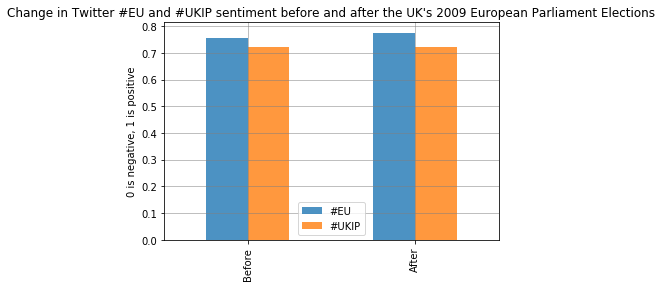

In [12]:
###### if the message "<Figure size 640x480 with 1 Axes>" appears please run this cell code again

# uses libraries imported in the code cell above
# uses dataframes   dayBeforeEUP   and   dayAfterEUP   created in the previous code cell

# extracts a sub set dataframe according to string within tweet, expected to begin with hash but could be any string 
def tweetSubsetByHashtag(bigDF, whatHashtag):
    hashtagDF = bigDF[bigDF['Tweets'].str.contains(whatHashtag)]
    return hashtagDF

# not pretty
hashEUbeforeEUP = tweetSubsetByHashtag(dayBeforeEUP, '#EU')
hashUKIPbeforeEUP = tweetSubsetByHashtag(dayBeforeEUP, '#UKIP')
hashEUafterEUP = tweetSubsetByHashtag(dayAfterEUP, '#EU')
hashUKIPafterEUP = tweetSubsetByHashtag(dayAfterEUP, '#UKIP')

crudeMeanEUbeforeEUP = hashEUbeforeEUP['proAylienPolarity'].mean()
crudeMeanUKIPbeforeEUP = hashUKIPbeforeEUP['proAylienPolarity'].mean()
crudeMeanEUafterEUP = hashEUafterEUP['proAylienPolarity'].mean()
crudeMeanUKIPafterEUP = hashUKIPafterEUP['proAylienPolarity'].mean()

# prepare dataframes for plt
displayEUukip = [[crudeMeanEUbeforeEUP, crudeMeanUKIPbeforeEUP], [crudeMeanEUafterEUP, crudeMeanUKIPafterEUP]]
axesDF = DataFrame(displayEUukip, columns=['#EU','#UKIP'], index=['Before','After'])

axesDF.plot(kind = 'bar', alpha=0.8)
#plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('0 is negative, 1 is positive')
plt.title('Change in Twitter #EU and #UKIP sentiment before and after the UK\'s 2009 European Parliament Elections')
plt.show()

The gains in positive sentiment are all in tweets containing #EU.  #UKIP twitter sentiment is unchanged.  It is worth considering that #EU tweets can refer to elections throughout Europe on the dates that the tweets were harvested from.  Also, after looking through the parent AssessmentData-0.csv it is apparent that Twitter users identifying with languages 'de' (German) or 'fr' (French) tweet in English as well as their identified language [though curiously never observed tweeting in other European languages but this is not the subject of this investigation].

(Working with dataframes like this in Python is quite repetitive even with functions and it could be more efficient working in SQL.  However, after spending a few days unable to even log in to my local MySQL server the investigations returned to dataframes.)

# Scatter plots and searching for correlation

So far the barchart displays reveal little and the next investigations will be on sentiment scatter plots.  A surprise occurrence would a good subject for temporal analysis of Twitter. There would be no tweets before the event, no existing tweet patterns, no established areas of tweet agreement or discord. It might be possible to see public behaviour change from initial natural reactions to modified reactions as the news spread. Unfortunately and inevitably and because spontaneous good events are rare, the subject will likely be a tragedy.

The horrific assassination of Labour MP Jo Cox on Thursday 16th June 2016 in Birstall a week before the UK's referendum on EU membership is such a subject. The day before no tweets contained #JoCox. The reaction on Twitter to her death produced a flood of tweets and it may be that some patterns emerge. 

### Run these two scripts to display scatterplots of #JoCox tweet sentiment for two evenings

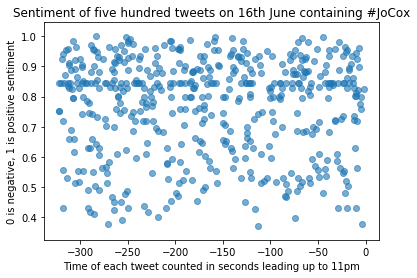

In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# same function as earlier, this time fewer dataframe columns are passed to the function
def tweetSubsetByDate(bigDF, columnNameList, whatDate):
    allDates = bigDF.loc[:, columnNameList]
    newDF = allDates.loc[allDates['TweetDate'] == whatDate]
    return newDF

# calculates time difference in seconds between two timestamps
# timestamps must be on same day
# returns negative times because the Twitter API results progress backwards in time before the end time of the request 
def secondsFromAnyTime(zeroTime, anyTweetTime):
    zeroH, zeroM, zeroS = zeroTime.split(":")
    tweetH, tweetM, tweetS = anyTweetTime.split(":")
    zeroH = int(zeroH); zeroM  = int(zeroM); zeroS = int(zeroS)
    tweetH = int(tweetH); tweetM  = int(tweetM); tweetS = int(tweetS)
    elapsedSeconds = ((tweetH - zeroH) * 3600) + ((tweetM - zeroM) * 60) + (tweetS - zeroS)
    return elapsedSeconds

tweetDFwhole = pd.read_csv('AssessmentData-0.csv')

# cannot get away from the fact all these tweets will be about Jo Cox's life and death 
dayOfDeath = tweetSubsetByDate(tweetDFwhole, ['TweetDate', 'TweetTime', 'proAylienPolarity'], '2016-06-16')
dayAfterDeath = tweetSubsetByDate(tweetDFwhole, ['TweetDate', 'TweetTime', 'proAylienPolarity'], '2016-06-17')
# create new lists to be filled and then appended to the sub set dataframes 
dayOfDeath['ElapsedTime'] = "NaN"
dayAfterDeath['ElapsedTime'] = "NaN"

xcolumn = []
for xtime in dayOfDeath.TweetTime:
    elapsedSeconds = secondsFromAnyTime("23:00:00", xtime)
    xcolumn.append(elapsedSeconds)

dayOfDeath['ElapsedTime'] = xcolumn

# could have thought this through first and avoided repetition but time is very short now
xcolumn = []
for xtime in dayAfterDeath.TweetTime:
    elapsedSeconds = secondsFromAnyTime("23:00:00", xtime)
    xcolumn.append(elapsedSeconds)

dayAfterDeath['ElapsedTime'] = xcolumn

# plot the two graphs from separate code cells?  One day I'll find out how to plot two graphs from one code cell
plt.title('Sentiment of five hundred tweets on 16th June containing #JoCox')
plt.xlabel('Time of each tweet counted in seconds leading up to 11pm')
plt.ylabel('0 is negative, 1 is positive sentiment')
plt.scatter(x = dayOfDeath['ElapsedTime'], y = dayOfDeath['proAylienPolarity'], alpha = 0.6)

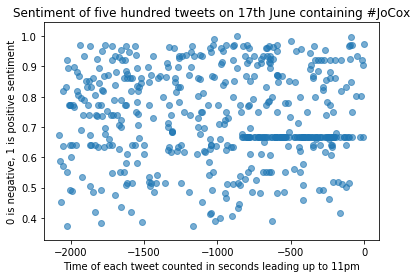

In [4]:
# this is the script for the second graph
plt.title('Sentiment of five hundred tweets on 17th June containing #JoCox')
plt.xlabel('Time of each tweet counted in seconds leading up to 11pm')
plt.ylabel('0 is negative, 1 is positive sentiment')
plt.scatter(x = dayAfterDeath['ElapsedTime'], y = dayAfterDeath['proAylienPolarity'], alpha = 0.6)

There is a visible change downwards in tweet sentiment from one day to the next and hopefully a normalising scatter matrix will reveal some correlation.

### Run this script for a four-by-four scatter matrix of the variables in the previous two graphs

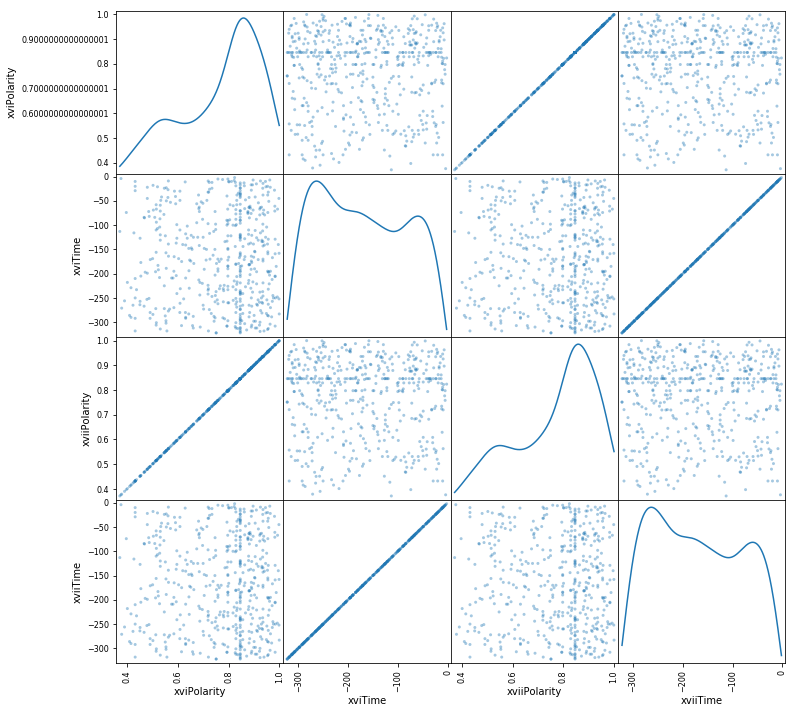

In [7]:
# drop old indices and create new ones because they retained their index from the original 27,000 tweet dataframe
dayOfDeath = dayOfDeath.reset_index(drop = True)
dayAfterDeath = dayOfDeath.reset_index(drop = True)

# use Roman numerals xvi for 16th and xvii for 17th
correlateJoCox = pd.DataFrame(columns = ['xviPolarity', 'xviTime', 'xviiPolarity', 'xviiTime'])
correlateJoCox['xviPolarity'] = dayOfDeath['proAylienPolarity']
correlateJoCox['xviTime'] = dayOfDeath['ElapsedTime']
correlateJoCox['xviiPolarity'] = dayAfterDeath['proAylienPolarity']
correlateJoCox['xviiTime'] = dayAfterDeath['ElapsedTime']

# the big moment!
scatterTextOutput = pd.plotting.scatter_matrix(correlateJoCox, alpha=0.4, figsize=(12, 12), diagonal='kde')

The smooth curves are odd.  What are they doing there?  The times and sentiment scores of the five hundred tweets returned by the API request are very different for the 16th and 17th of June (see the first two scatter plots) but they have produced identical results in the scatter matrix.

Conclusion
Sentiment analysis is just the beginning.  Word clouds (ref) might reveal more key terms to enable linguistical tics and fashions similar to Chicago language studies (ref)

# References

Anstead, N. and O’Loughlin, B. (2011). The Emerging Viewertariat and BBC Question Time. The International Journal of Press/Politics, 16(4), pp.440-462.

European Council, [online] Available https://www.consilium.europa.eu/en/european-council/president/ [Accessed 20 April 2019]

International Organization for Standardization.  [online] Available https://www.iso.org/iso-8601-date-and-time-format.html  [Accessed 20 Apr 2019]

Loader, B. and Mercea, D. (2011). NETWORKING DEMOCRACY?. Information, Communication & Society, 14(6), pp.757-769.

Muldoon, O., Trew, K., Todd, J., Rougier, N. and McLaughlin, K. (2007). Religious and National Identity after the Belfast Good Friday Agreement. Political Psychology, 28(1), pp.89-103.

Twurl instructions [online] https://developer.twitter.com/en/docs/tutorials/using-twurl.html [Accessed 	2019-04-20 12:39:04]

Vey, J., Lough, R. and Baczynska, G. (2019). France talks tough on no-deal Brexit deadline, at odds with others. [online] www.reuters.com. Available at: https://www.reuters.com/article/us-britain-eu-france-idUSKCN1R31I3 [Accessed 5 Apr. 2019].
        
US Naval Observatory Astronomical Applications Department. [online] https://aa.usno.navy.mil.  Available at: https://aa.usno.navy.mil/faq/docs/moon_phases.php [Accessed 6 Apr. 2019].       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places

### Data Preprocessing

The dataset you'll be working with today relates to the personal characteristics of over 32000 individuals. Our task is to work out whether we can predict whether an individual's income is above or below $50000 per annum, based solely on their demographic characteristics. While we are dealing with quite a few attributes here, we're only predicting over two classes, thus it is a relatively straightforward classification problem.

You can find the dataset on Moodle. **Download it, and import it as a Pandas dataframe called `original_data`. Inspect the dataset, and use the accompanying metadata to help you understand what you have.**

As you will notice, the data you have been provided with an indicator stating whether the individual does or does not earn over $50000 per annum. Well we use this indicator to define the relationship between the individual's characteristics and this classification.

But to get their, we need to start splitting up our dataset. We need one dataset containing our attribute data, and we need one dataset containing our classifications. We'll eventually pass both of these to the classifier so that it can identify the classification relationship.

So first, we will create our attribute dataset. **Create a new dataframe called `data` that includes all attributes from `original_data` except the `over50k` attribute. Remember to check the contents of your new dataframe to ensure this is the case.**

Now we will create our equivalent label dataset. To do this, we'll use our first tool from `scikit`, the `LabelEncoder`. This usefully takes a column of data and transforms it into the format required for our `scikit` classifiers. We can use the `le` encoder we create here later on to reverse the encoding.

**Run the scripts below to first import the `LabelEncoder` tools, and then create the labels dataset from the `over50k` class column.** 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder() # creates the LabelEncoder object
labels_fea = le.fit_transform(original_data['over50k']) # runs LabelEncoder on the over50k column

Now we have our dataset and our labels. Good to go right? Well not quite yet. 

As you will have understood by now, in analysing data a great deal of effort is spent on converting our raw data into the right format to begin with. Well, unfortunately, our classifiers do not play well with text data, and so before we go on we must convert our data into something that can be used by our classifers. 

We do this by converting each categorical attribute into a range of additional boolean columns representing each category, marked with 1s or 0s. This doesn't change the structure of the dataset as the boolean values will continue to to distinguish between features.

Once again, we use a `scikit` library to execute this stage. In this case, we use `DictVectorizer`. `DictVectorizer` takes our data as a series of dictionaries, and transforms it into a matrix, free of categorical data. **Run through the following commands.** Starting with our importing of the `DictVectorizer` library.

In [ ]:
from sklearn.feature_extraction import DictVectorizer

Now we convert our attribute data to an array of dictionaries for the `DictVectorizer`. We use the `Pandas` `to_dict()` function for this. The `'records'` flag ensures that the attribute dataset is converted into an array of dictionaries, where each dictionary represents a single data record.

**Run the script to create the dictionaries, and verify the data by checking the first entry.**

In [ ]:
data_dict = data.to_dict('records')

**Now we run the `DictVectorizer` to extract the matrix.** This is a very simple procedure, and note below how the commands needed to run this are very similar to those used earlier.

In [ ]:
vec = DictVectorizer()  # create the DictVectorizer object
vec_data = vec.fit_transform(data_dict)  # execute process on the record dictionaries

**Now check `vec_data` to see how widely the dataset has been expanded (remember it consisted of 14 attributes before). Then convert the matrix into an array for loading into the classifers.**

In [ ]:
vec_array = vec_data.toarray() 

The final stage in data processing involves splitting the prepared dataset into training and testing subsets. The training data will be used to create the classifier. The testing data will then be used to test the accuracy of a the classification. 

**IMPORTANT**: Splitting the dataset up in this way is an important step. It tests how well the classifier performs against data it hasn't yet seen. This gives a good picture of how well the classifier may work in future. However, remember that we are drawing both training and testing data from the same sample, and so future datasets may not align with the same biases.

Once more, we have a useful tool is `scikit` to enable this. The `train_test_split` method (surprisingly named) randomly splits our attribute and label data into training and testing subsets. Not only does this provide us with  formats to be loaded directly into our classifers, but the random split ensures a good mixing of the records. 

The process is quite straightforward. **We load in the `train_test_split` method and run it against our attribute and label arrays.**

Note: `train_test_split` will split the data according to a 75:25 split, roughly in line with convention. However, other proportions can be specified, check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) for details.

In [ ]:
from sklearn.cross_validation import train_test_split

In [ ]:
train_d, test_d, train_lab, test_lab = train_test_split(vec_array, labels_fea)

**Check the lengths of the training and testing datasets.**

We are now ready to start creating our classifiers.

### k-Nearest Neighbour Classification

The first classifier will use is the *k*-Nearest Neighbour (*k*NN) classifier. This is a very simple method by which tested points are classified according to their proximity (in terms of attribute distance) to points that were seen during training. 

In this section, we will show you how to use the *k*NN classifer in `scikit`, as well as going into detail about how you can assess the quality of the classification as part of your validation.

**IMPORTANT**: Many of the `scikit` classification methods use a very similar syntax. We will show you how to use *k*NN, but you will have to work out how to use the others. On completion, we expect you to be able to say which of the four classifiers you will test performs best in predicting whether the individuals in our test dataset earn more or less than $50k per annum.

Across all `scikit` classifiers, a similar process and form of syntax is used. 

1. First, we load the library. 
2. Then, we create the classifier object, and specify any important parameters.
3. We run the `.fit()` method, sending the classifier our training dataset and accompanying labels.
4. We analyse the validate with the `.score()` method, sending the classifier our testing dataset and accompanying labels.

Let's work through this method for the *k*NN classifer.

**First, we import the relevant library from `scikit`.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Now, we create the classifier object and give it a name (`knn` in our case), and run it. 

On creating the object, we specify any important parameters. To understand what parameters are needed requires understanding the method and the syntax. It is worth you reading the `scikit` documentation on *k*NN at this point, which will provide you details on how to execute the method. 

[This page](http://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) is a general description of the method. Whereas [this page](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) outlines all of the parameters and methods associated with the `KNeighborsClassifier` method. You'll need to check the documentation for any classifer you use.

As you will recall, an important element of the *k*NN approach is the specification of how many neighbours to consider when making the classification. You can see below how this parameter is defined.

You'll see from the script below that running this process is very similar to the creation of clusters and regression models last week. **Before you run the script, add in a script to time how long the `.fit()` takes to execute, you'll do the same with other classifiers by way of comparison.**

In [ ]:
# add timing script
knn = KNeighborsClassifier(n_neighbors=60)  # creates the kNN classifier, setting it to check the 60 neighbouring points
knn.fit(train_d, train_lab)  # executes the classifier on the training dataset

Now, finally, we test how well the classifier predicts the classes of our test dataset. For this stage, we send the test data and labels to the `.score()` function. This outputs a number representing the proportion of classes correctly guessed by the classifer. It requires you to pass it both the test data and test labels.

**Run the script below to see how well *kNN* performs in this case.**

In [ ]:
knn.score(test_d, test_lab)

Well done, you've created and tested a classifer. And the classifier seems to do pretty well. In any future event, given a load more data we'll be able to predict the salary class of an individual with an expected accuracy of 79%, right? Well, hold on there, we better do some further tests just to check how good this score actually is...

There are a number of other important ways to assess the quality of your classifier that you should be aware of.

First, you can have a look yourself at the actual results, and identify the records where predictions succeed and fail. You can do this by generating a set of predictions for each record, done using the `.predict()` method. Like `.score()`, this generates classes for a test dataset, but does take a set of labels. You will use this method in classifying any future unlabelled dataset you wish to classify.

**The predictions are recorded within an array using the script below.**

In [ ]:
predictions = knn.predict(test_d)

If you look at `predictions`, however, you'll find just 0s and 1s, as these relate to the outputs generated by `LabelEncoder` earlier. What we need to do is convert these back to the original label data. We do this using the `le.inverse_transform` command. We then convert this into a list, and eventually into a Dataframe for easier manipulation. 

**Look at the code below and execute it to produce an ordered list of predicted classifications for the `test_d` dataset.**

In [ ]:
predicted = pd.DataFrame(list(le.inverse_transform(predictions)))

Now you have this dataset, we want to explore how the predictions vary with the data. **First, run the label decoder again on the test labels.**

**Next join the predicted classifications to the actual labels (from the test data) to create a new dataframe.**

**Finally, create a new column in the joined dataframe indicating whether the two label values match (check out the `.apply()` function).** You may need to rename your columns in order to achieve this.

As a final step, write a quick function to test that the `scikit` `.score()` function worked correctly. **Simply calculate the proportion of correct classifications.** Your score should match the one from earlier.

Another useful set of tools are found in the `scikit` `metrics` library. This toolkit provides a range of measures relating to the predictive power of your classifier. 

A nice and simple exploratory tool is a confusion matrix. This describes the the extents to which each class was correctly and incorrectly classified. It is generated using the `.confusion_matrix()` method, which takes the correct and predicted results. These can then be nicely visualised using the `matplotlib` matrix plotting functions.

**First, create the matrix and inspect it - what can you derive from this?**

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(test_lab, predictions)

**Now, create the confusion matrix. Does this seem clearer? Where is the majority of the error in the classification?** You can read more about the confusion matrix [here](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix)

In [ ]:
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

While these measures above provide an overview of the classifier quality, other measures made available in the `metrics` toolset enable a more detailed understanding. Many of the most important measures can be extracted using the `classification_report()` method, which again takes correct labels and compares them against the classifier predictions.

These metrics, called `precision`, `recall` and `f1`, all measure how well a classifier does in predicting each class relative to how often it is incorrect. As such, it allows us to identify the prediction classes where it performs well and where it performs poorly. 

**Before executing the code below, look at the [documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) here to gain a little understanding of these measures**

In [ ]:
print metrics.classification_report(test_lab, predictions)

The most striking of these results is that the classifier performs very poorly in identifying individuals earning over $50000 per annum. We can see this from the very low recall score. **This should be a concern to us**, given that were our future samples to contain many more individuals within this category, our classifier would not be equipped to identify them. Our initial excitement about the quality of this classifier may have been misplaced.

In the real-world you'd consider two potential actions in response to findings like these:

1. Recreate the classifier using a different set of parameters.
2. Use a different classifier to see if you achieve better results.

In our case, we'll forget the *k*NN approach and begin with testing other classifiers, to see if we get any better results. But from here on you need to do the coding yourself - creating the classifier and then testing to see how well it performs.

### Decision Tree

The first method you should try is the Decision Tree. 

The Decision Tree does not (necessarily) require any parameters when being setup so is quite easy to implement, just follow the same method and syntax used above. In this case, however, you'll be working with  `DecisionTreeClassifier` rather than `KNeighborsClassifier`.

Before you start, check the [documentation](http://scikit-learn.org/stable/modules/tree.html#classification) here.

**Now create a Decision Tree classifier for the same scenario and datasets used earlier** (you don't need to recreate the datasets, they are good to go already). We've given you the library import code below to get you started.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

**Work through the stages used during the creation of the *k*-Nearest Neighbour classifier, and identify whether the Decision Tree outperforms this *k*NN approach or not.**

Also investigate...

- How to output the tree structure using `export_graphviz()`
- The impact of changing the `max_depth` and `min_sample_split` parameters

### Random Forest Classifer

Next, carry out the same process using a Random Forest classifier.

Unlike the Decision Tree, the Random Forest requires you to specify a parameter called `n_estimators`. This parameter specifies how many trees should be created in the construction of the whole forest. The more trees you choose, the longer the classification process will take to run.

So first, read up on the `scikit` Random Forest method [here](http://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees), and identify how you can set the `n_estimators` parameter and then follow through the same classifier creation and testing process used above.

**How well does this model perform relative to the Decision Tree and *k*-Nearest Neighbour approaches? How does varying the number of trees impact on the quality and speed of prediction?**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Support Vector Machines

Finally, try to create a Support Vector Machine (SVM) using exactly the same approach.

The SVM approach requires specification of one important parameter, the `kernel` parameter which relates to the type of kernel to use. Crudely, a linear kernel will draw a straight line between sets of features (located according to their attributes), whereas others are more flexible. 

Read through the [documentation](http://scikit-learn.org/stable/modules/svm.html#classification) to understand the differences in kernel specification and how you set this parameter. The `scikit` page on SVM has a nice visualisation demonstrating these differences.

**Now test the SVM approach to see how well it performs relative to the other methods you've tried. How do different kernels and gamma settings impact on the prediction results? ** 

**WARNING**: SVM can take a long time to run! Maybe go and get a cup of tea?

In [ ]:
from sklearn.svm import SVC

### In Conclusion...

So, now that you've tested all of the different classification algorithms, which method performs best overall? Which assessment measure provided you with the most insight? And, which method would you use in the future? Which do you like best?

### Exercises

Think you're now a classification expert eh? Well, if you were a true expert you'd easily brush away any of the challenges below. Go on, give at least one of them a go.

* One popular method we haven't talked about is Naive Bayes classification. This is very popular in text classification, using the probabilistic co-occurance of values to assign classes. It's as easy to implement as the methods you've already used. Look it up on `scikit` and see if you can implement it.
* Try testing each of the classifiers using subsets of the original dataset. Can you create a classifier using only a few of the feature attributes?
* Try creating a classifier for another dataset. One of your own perhaps? Or have a go with the Iris dataset that you used in the last workshop.
* Do variations in the sizes of the training and testing datasets impact on the prediction quality? Try testing different divisions of the data by adjusting the parameters within the `train_test_split` method that we used earlier.
* Perhaps we were a little quick to ditch the *k*NN method earlier without reparameterising it. Go reinvestigate it, adjusting the number of neighbours we consider in making the classification. You can change the way neighbours are assessed too, check out the documentation to find out how.